In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Understanding columns:

Dataset merupakan hasil pemeriksaan beberapa pasien rumah sakit XYZ terhadap kemungkinan memiliki penyakit jantung. Data-data yang dikumpulkan antara lain: umur, gender, dan keterangan-keterangan mengenai tekanan darah (level kolesterol, heart rate, dll). Data ini berikutnya dibandingkan terhadap kolom 'target', yaitu hasil diagnosis ada atau tidaknya penyakit jantung pada pasien. Dari dataset ini dapat dilakukan studi terhadap faktor-faktor yang mempengaruhi pasien menderita penyakit jantung atau tidak. 
### Kolom-kolom dataset:
1. age: umur
2. Sex: gender (1: male, 0: female)
3. cp: chestpain (typical, asymptotic, nonanginal, nontypical)
4. trestbps: Resting blood pressure
5. chol: serum cholestoral (mg/dl)
6. fbs: Fasting blood sugar > 120 mg/dl (1: true, 0: false)
7. restecg: Resting electrocardiographic results
8. MaxHR: Maximum heart rate achieved
9. ExAng: Exercise induced angina (1: yes, 0: no)
10. Oldpeak: ST depression induced by exercise relative to rest
11. Slope: Slope of the peak exercise ST segment
12. Ca: number of major vessels colored by fluoroscopy (0 - 3)
13. Thal: talasemia - keberadaan disorder pada keping darah (3: normal, 6: cacat permanen, 7: cacat yang reversible)
14. Target: diagnosa penyakit jantung (1: ya, 0: tidak)

# Problem Statement

Dalam kondisi pandemi seperti saat ini, rumah sakit memiliki kesibukan ekstra karena harus menghandle pasien suspect Covid-19 dan menghadapi penyakit2 penyertanya. Oleh karena itu, dokter dan tenaga kesehatan membutuhkan bantuan untuk mendiagnosa pasien dengan tingkat akurasi tinggi, sehingga dokter-dokter dapat fokus merawat pasien-pasien yang memang butuh perawatan. Algoritma Machine Learning diharapkan mampu membantu proses diagnosa keberadaan penyakit jantung pada pasien dengan tingkat akurasi yang baik.


# Project Goals:
1. Menentukan faktor-faktor yang mempengaruhi seseorang memiliki penyakit jantung/tidak
2. Dari dataset, menentukan kecenderungan faktor usia dalam mempengaruhi seseorang memiliki penyakit jantung
3. Menentukan algoritma Machine Learning untuk proses diagnosa pasien berpenyakit jantung
==> Hasil diagnosa yang dihindari adalah False Negatif: dimana seorang pasien sebenarnya memiliki penyakit jantung, namun hasil diagnosa menyatakan tidak memiliki penyakit jantung. Oleh karena itu, evaluasi yang dipertimbangkan dalam pembuatan model machine learning adalah Recall

## Kolom target yang ditentukan: 'target'

In [6]:
# pengecekan imbalanced data

df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

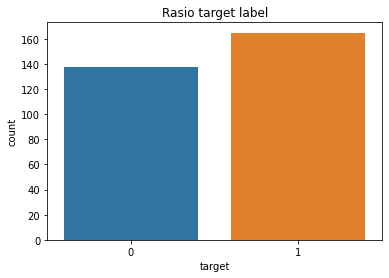

In [7]:
## rasio target label

sns.countplot(x='target', data=df)
plt.title('Rasio target label')
plt.show()

## Insight
Dari pengecekan value pada kolom target, data cenderung balanced dengan komposisi yang hampir sama.

## Describe dan Handling missing value (jika ada)

In [8]:
desc = []

for i in df.columns:
    desc.append([
        i,
        df[i].dtypes,
        df[i].isnull().sum(),
        round((((df[i].isnull().sum())/(len(df)))*100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [9]:
dfDesc = pd.DataFrame(desc, columns=['dataFeatures', 'dataType', 'null', 'nullPercentage', 'unique', 'uniqueSample'])

In [10]:
dfDesc

,dataFeatures,dataType,null,nullPercentage,unique,uniqueSample
0,age,int64,0,0.0,41,"[46, 44]"
1,sex,int64,0,0.0,2,"[0, 1]"
2,cp,int64,0,0.0,4,"[1, 0]"
3,trestbps,int64,0,0.0,49,"[150, 122]"
4,chol,int64,0,0.0,152,"[417, 182]"
5,fbs,int64,0,0.0,2,"[1, 0]"
6,restecg,int64,0,0.0,3,"[1, 2]"
7,thalach,int64,0,0.0,91,"[171, 129]"
8,exang,int64,0,0.0,2,"[0, 1]"
9,oldpeak,float64,0,0.0,40,"[4.0, 0.6]"


### Insight:

Tidak ada missing value

## Cek statistik deskriptif data

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# Exploratory Data Analysis

### ** Histogram kolom Age **

In [12]:
# plt.figure(figsize=(10, 8))
# sns.set_style('whitegrid')
# df['age'].hist(bins=30)
# plt.title('Distribusi usia pasien', size=20)
# plt.xlabel('age', size=12)
# plt.ylabel('frekuensi', size=12)
# plt.show()

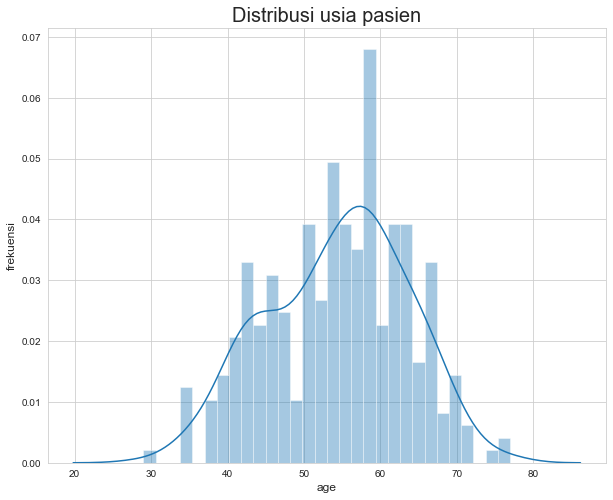

In [13]:
plt.figure(figsize=(10, 8))
sns.set_style('whitegrid')
sns.distplot(df['age'], bins= 30)
plt.title('Distribusi usia pasien', size=20)
plt.xlabel('age', size=12)
plt.ylabel('frekuensi', size=12)
plt.show()

In [14]:
print(f"Usia dengan jumlah pemeriksaan pasien paling banyak: {df['age'].mode()}")

Usia dengan jumlah pemeriksaan pasien paling banyak: 0    58
dtype: int64


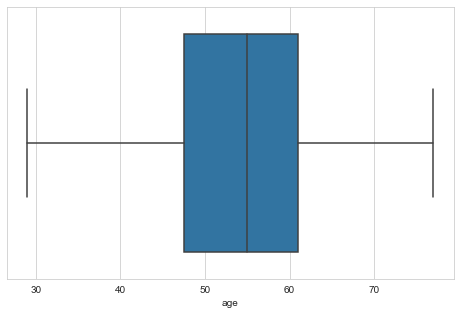

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['age'])

In [16]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

## Insight:

Dilakukan analisis terhadap feature usia pasien dengan 2 visualisasi (boxplot dan histogram) dengan kurva yang memiliki kecenderungan terdistribusi normal. Dari data boxplot terlihat bahwa tidak ada data outliers dalam kolom usia. Dari 303 pemeriksaan pasien, usia rata-rata pasien yang diperiksa adalah 54 tahun, sementara usia dengan pemeriksaan paling tinggi adalah 58 tahun (modus), dan usia minimal pasian yang diperiksa adalah 29 tahun.

## ** analisis kolom gender **

1: male; 0: female

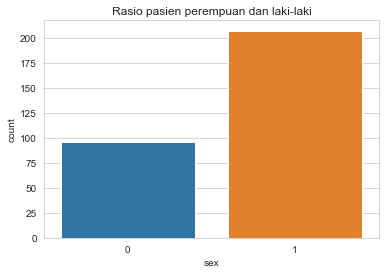

In [17]:
## rasio pasien perempuan dan laki-laki

sns.countplot(x='sex', data=df)
plt.title('Rasio pasien perempuan dan laki-laki')
plt.show()

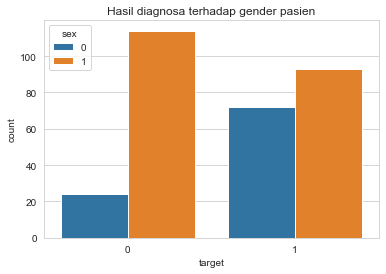

In [18]:
sns.countplot(x='target', data=df, hue='sex')
plt.title('Hasil diagnosa terhadap gender pasien')
plt.show()

## Insight:

Dilakukan analisis terhadap feature gender pasien terhadap hasil diagnosa dengan visualisasi barchart. Dari visualisasi terlihat bahwa pasien dengan diagnosa memiliki penyakit jantung dengan gender laki-laki lebih banyak dari gender perempuan. Jumlah pasien laki-laki lebih banyak untuk kedua kategori (positif dan negatif) kemungkinan dikarenakan jumlah pasien laki-laki yang melakukan pemeriksaan jantung juga lebih banyak daripada pasien perempuan (dari barchart perbandingan pasien laki-laki dan perempuan)

## ** analisis kolom CP **

Chest Pain

dalam deskripsi dataset (attribute information), cp merupakan atribut ChestPain yang merupakan data kategorikal dengan kategori: typical, asymptomatic, nonanginal, nontypical. Karena tidak dijelaskan label-label 0, 1, 2, 3 menjelaskan kategori apa saja, maka diasumsikan 3 adalah typical, 2: asymptomatic, 1: nonanginal, 0: nontypical.

- 3: typical
    - typical cardiac chest pain character: burning or chest heaviness radiates to the neck, left shoulder, or left arm, associated with shortness of breath (https://www.mdedge.com/content/typical-chest-pain)
    
- 2: asymptomatic
    - neither causing nor exhibiting symptoms of disease (http://www.ilpi.com/msds/ref/asymptomatic.html#:~:text=Definition,heart%20attack%20(myocardial%20infarction)
    
- 1: nonanginal
    - duration is over 30 minutes or less than 5 seconds, can be relieved immediately on lying down (https://pubmed.ncbi.nlm.nih.gov/2255129/#:~:text=A%20chest%20pain%20is%20very,relieved%20immediately%20on%20lying%20down)
    
- 0: nontypical
    - definition is not clear, and different people may mean different things by nontypical chest pain (https://www.buoyhealth.com/learn/atypical-chest-pain/)

In [19]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

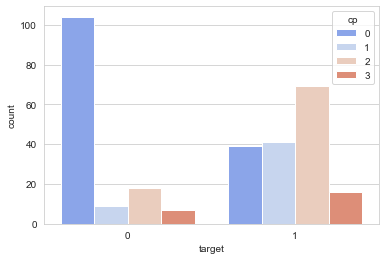

In [20]:
sns.countplot(x='target', data=df, hue='cp', palette='coolwarm')
plt.show()

## insight:

Pada pasien dengan diagnosa positif memiliki penyakit jantung, nyeri dada (chest pain) yang dirasakan termasuk dalam kategori 2: asymptomatic, dengan karakteristik tidak menunjukkan gejala. (http://www.ilpi.com/msds/ref/asymptomatic.html#:~:text=Definition,heart%20attack%20(myocardial%20infarction)

Sementara pasien dengan keluhan nyeri dada kategori 0: nontypical, umumnya memberikan hasil negatif terhadap pemeriksaan penyakit jantung. Keluhan nyeri dada nontypical tidak memiliki definisi yang pasti, dimana tiap pasien yang diperiksa mengalami nyeri dada dengan keluhannya masing-masing (https://www.buoyhealth.com/learn/atypical-chest-pain/)

Dari data pemeriksaan ini, dapat terlihat bahwa tidak semua nyeri dada menunjukkan bahwa seseorang memiliki penyakit jantung, tetapi ada nyeri dada tertentu yang mengarah ke diagnosa bahwa seseorang memiliki penyakit jantung, sehingga harus dilakukan pemeriksaan lanjutan.

In [21]:
df.groupby(['target', 'cp'])['chol'].aggregate(['mean', 'max', 'min'])

mean  max  min
target cp                      
0      0   251.932692  409  131
       1   263.444444  319  229
       2   239.000000  335  149
       3   253.714286  288  204
1      0   245.333333  394  149
       1   240.682927  342  157
       2   244.260870  564  126
       3   229.875000  298  182

### insight tabel:

Tidak ada relasi yang cukup signifikan antara nyeri dada, diagnosa positif, dan kolesterol darah, dimana tiap feature memiliki variasi sendiri-sendiri, sehingga perlu dilakukan analisis terhadap feature lain.

## ** analisis kolom RestBps (trestbps) **

RestBps: resting blood pressure (tekanan darah pada kondisi istirahat)

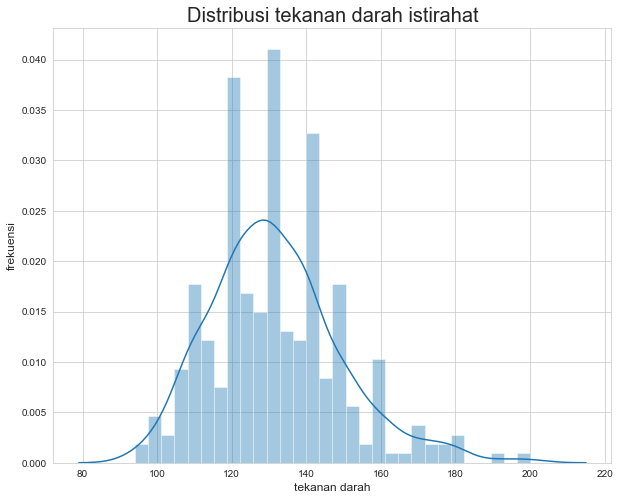

In [22]:
plt.figure(figsize=(10, 8))
sns.set_style('whitegrid')
sns.distplot(df['trestbps'], bins= 30)
plt.title('Distribusi tekanan darah istirahat', size=20)
plt.xlabel('tekanan darah', size=12)
plt.ylabel('frekuensi', size=12)
plt.show()

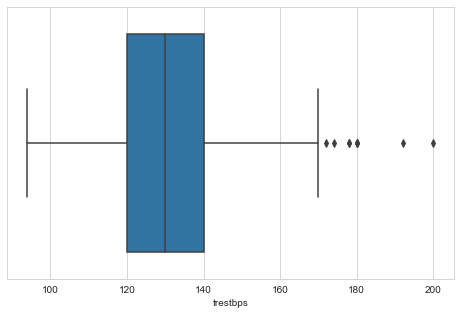

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['trestbps'])

In [24]:
df['trestbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

## insight:

RestBps (resting blood pressure) normal pada dewasa kurang lebih pada 120/80 mmHg (https://en.wikipedia.org/wiki/Blood_pressure#:~:text=Normal%20resting%20blood%20pressure%2C%20in,"120%2F80%20mmHg).
Dari histogram terlihat bahwa distribusi data tekanan darah cenderung terdistribusi normal dengan rata-rata sebesar 131 mmHg. Boxplot restbps menunjukkan bahwa terdapat beberapa nilai outliers pada tekanan darah yang tinggi, hingga mencapai 200 mmHg.

In [25]:
## data outliers pada kolom restbps:

outliers = []
def outlier_iqr(data):
    sorted(data)
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)
    for i in data:
        if i < lower_bound or i > upper_bound:
            outliers.append(i)
    return outliers
outlier_datapoints = outlier_iqr(df['trestbps'])
print('Data outlier pada kolom tekanan darah: ', outlier_datapoints)

Data outlier pada kolom tekanan darah:  [172, 178, 180, 180, 200, 174, 192, 178, 180]


In [26]:
df[(df['trestbps'] == 172) | (df['trestbps'] == 174) |  (df['trestbps'] == 178) |  (df['trestbps'] == 180) | (df['trestbps'] == 192) |
(df['trestbps'] == 200)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0


In [27]:
df[(df['trestbps'] == 172) | (df['trestbps'] == 174) |  (df['trestbps'] == 178) |  (df['trestbps'] == 180) | (df['trestbps'] == 192) |
(df['trestbps'] == 200)]['age'].describe()

count     9.000000
mean     59.222222
std       5.629782
min      52.000000
25%      55.000000
50%      59.000000
75%      64.000000
max      68.000000
Name: age, dtype: float64

# insight:

Pasien dengan tekanan darah tinggi (yang merupakan outlier dari keseluruhan data) memiliki rata-rata usia 59 tahun, usia minimal 52 dan maksimal 68 tahun.

## ** analisis kolom chol (cholesterol) **

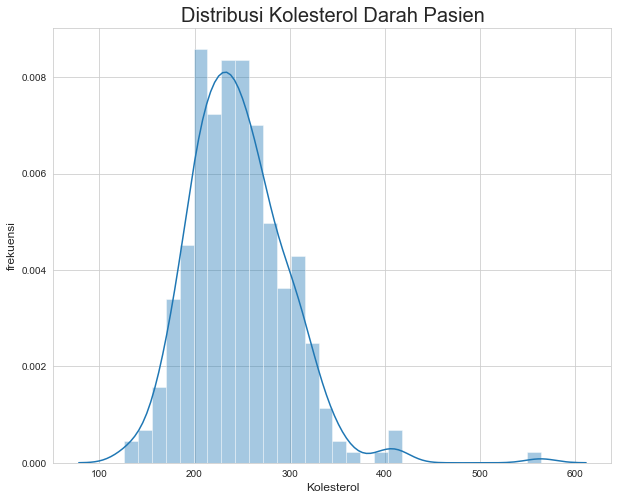

In [28]:
plt.figure(figsize=(10, 8))
sns.set_style('whitegrid')
sns.distplot(df['chol'], bins= 30)
plt.title('Distribusi Kolesterol Darah Pasien', size=20)
plt.xlabel('Kolesterol', size=12)
plt.ylabel('frekuensi', size=12)
plt.show()

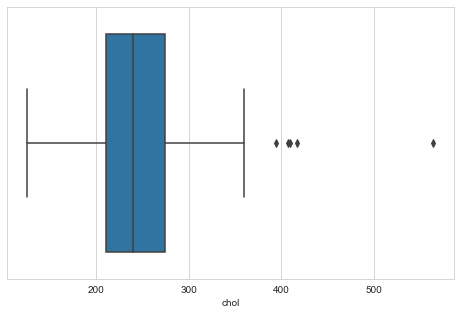

In [29]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['chol'])

In [30]:
df['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

## insight:

kolesterol adalah sejenis lemak dalam darah (https://kidshealth.org/en/kids/cholesterol.html#:~:text=Cholesterol%20(say%3A%20kuh-LES,don%27t%20have%20any%20cholesterol).
Dari histogram terlihat bahwa distribusi data kolesterol dalam darah cenderung terdistribusi normal dengan rata-rata sebesar 246 mmHg. Boxplot cholesterol menunjukkan bahwa terdapat beberapa nilai outliers pada kolesterol yang tinggi, hingga mencapai di atas 500 mmHg.

In [31]:
## data outliers pada kolom restbps:

outliers = []
def outlier_iqr(data):
    sorted(data)
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)
    for i in data:
        if i < lower_bound or i > upper_bound:
            outliers.append(i)
    return outliers
outlier_datapoints = outlier_iqr(df['chol'])
print('Data outlier pada kolom kolesterol: ', outlier_datapoints)

Data outlier pada kolom kolesterol:  [417, 564, 394, 407, 409]


In [32]:
df[(df['chol'] == 417) | (df['chol'] == 564) |  (df['chol'] == 394) |  (df['chol'] == 407) | (df['chol'] == 409)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


# insight:

Pasien dengan kolesterol darah tinggi (yang merupakan outlier dari keseluruhan data) merupakan pasien pada rentang usia di atas 56 tahun.

In [33]:
# sns.pairplot(df, hue='target', palette='bwr')
# plt.show()

In [34]:
cat = df.drop(columns=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])

In [35]:
num = df.drop(cat, axis=1)

age


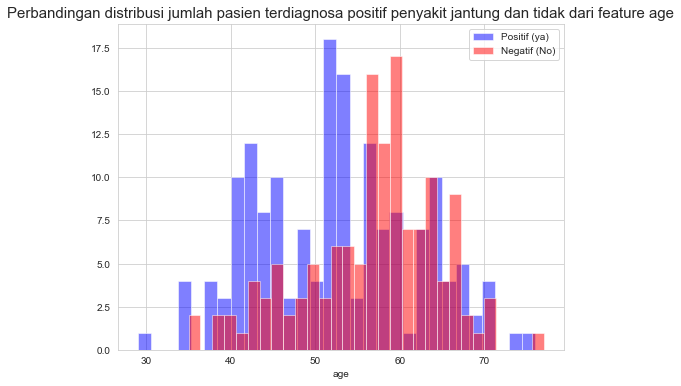

trestbps


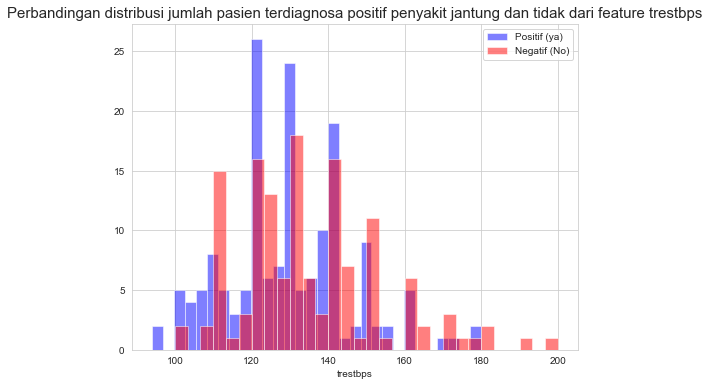

chol


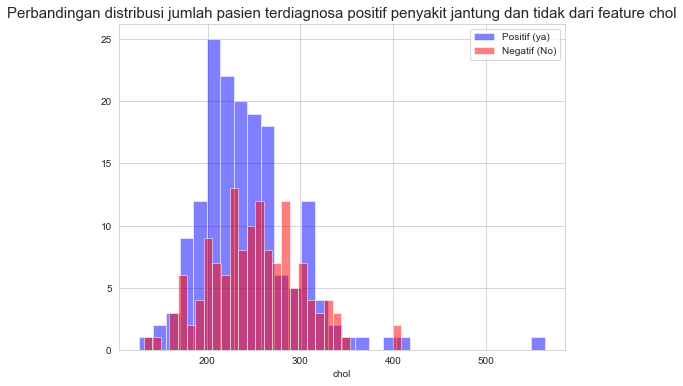

thalach


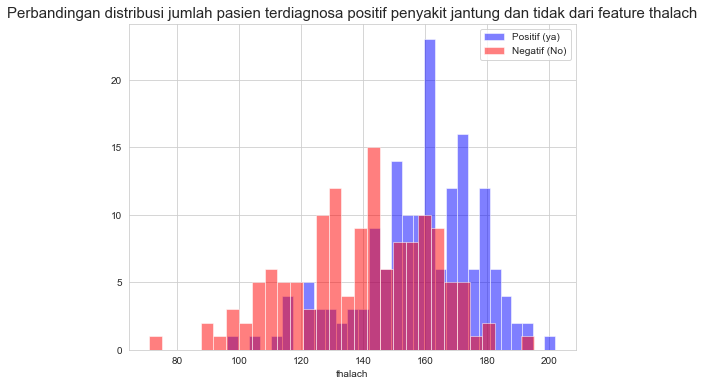

oldpeak


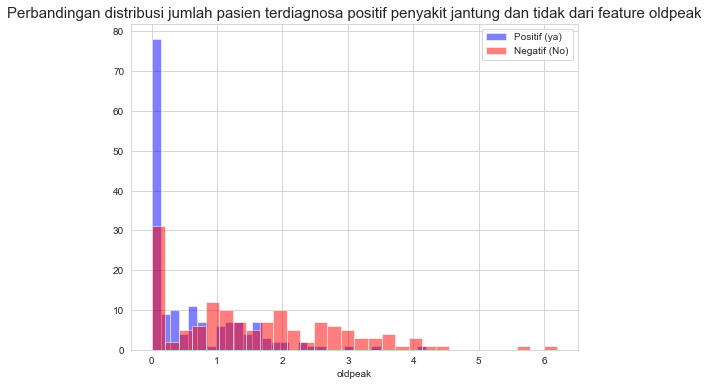

In [36]:
for i in num.columns:    
    plt.figure(figsize=(8, 6))
    print(i)
    df[df['target'] == 1][i].hist(alpha=0.5, color='blue',
                                          bins=30, label = 'Positif (ya)')
    df[df['target'] == 0][i].hist(alpha=0.5, color='red',
                                          bins=30, label = 'Negatif (No)')
    plt.legend()
    plt.title(f"Perbandingan distribusi jumlah pasien terdiagnosa positif penyakit jantung dan tidak dari feature {i}", fontsize=15)
    plt.xlabel(f"{i}")
    plt.show()

# insight: 

- Dari grafik feature kolesterol, terlihat bahwa pada rentang jumlah kolesterol yang sama, mayoritas pasien terdiagnosa memiliki penyakit jantung, sementara sebagian yang lain tidak. 

- Sementara dari feature thalach (denyut jantung), pasien dengan hasil diagnosa positif penyakit jantung terdistribusi pada kondisi denyut jantung yang tinggi. 

- Feature oldpeak berkaitan dengan ST depression, dimana ST depression berasosiasi 100% dengan risiko serangan jantung (https://pubmed.ncbi.nlm.nih.gov/11741361/). Dalam grafik, terlihat bahwa pasien dengan oldpeak = 0 lebih cenderung menghasilkan diagnosa positif penyakit jantung.

### ** Feature ca dan exang **

kedua feature ini berhubungan dengan kondisi pembuluh darah arteri (https://www.mayoclinic.org/diseases-conditions/angina/symptoms-causes/syc-20369373#:~:text=Angina%20is%20a%20type%20of,or%20pain%20in%20your%20chest).

- Ca: jumlah pembuluh darah utama yang menunjukan perubahan warna dalam pemeriksaan fluoroscopy
- ExAng: angina yang diinduced (ditrigger) dengan exercise (ya dan tidak)

In [37]:
df.groupby(['target', 'exang'])['target'].aggregate(['count'])

count
target exang       
0      0         62
       1         76
1      0        142
       1         23

### insight:

Pada pasien yang memberikan hasil diagnosa positif, umumnya pemeriksaan exercise induced angina memberikan hasil 0/ No. Angina merupakan nyeri dada yang disebabkan oleh berkurangnya aliran darah ke jantung, dan merupakan gejala dari kelainan pembuluh darah arteri koroner ke jantung. Angina umum dideskripsikan sebagai rasa tekanan dan sesak pada dada (https://www.mayoclinic.org/diseases-conditions/angina/symptoms-causes/syc-20369373#:~:text=Angina%20is%20a%20type%20of,or%20pain%20in%20your%20chest)

Hal ini menunjukkan bahwa diagnosa positif umumnya dihasilkan pada pasien yang menunjukkan tidak ada keluhan nyeri dada pada pemeriksaan exercise induced angina.

In [38]:
## feature ca: jumlah pembuluh darah besar yang menunjukkan warna pada pemeriksaan fluoroscopy

df.groupby(['target', 'ca'])['target'].aggregate(['count'])

count
target ca       
0      0      45
       1      44
       2      31
       3      17
       4       1
1      0     130
       1      21
       2       7
       3       3
       4       4

### insight:

Dari hasil pemeriksaan fluoroscopy, secara signifikan terlihat bahwa pasien yang menunjukkan 0 jumlah pembuluh darah yang menunjukkan perubahan warna berkorelasi pada hasil diagnosa positif memiliki penyakit jantung.

Fluoroscopy merupakan pemeriksaan untuk melihat aliran darah dalam pembuluh darah arteri untuk melihat ada/tidaknya penyumbatan dalam pembuluh darah (https://www.urmc.rochester.edu/encyclopedia/content.aspx?contenttypeid=92&contentid=P07662#:~:text=In%20cardiac%20catheterization%2C%20fluoroscopy%20is,Arthrography). Dengan pemeriksaan yang tidak menunjukkan perubahan warna pada arteri, berarti dapat diambil gambaran bahwa terjadi penyumbatan pada pembuluh darah, yang berpotensi menyebabkan penyakit jantung.

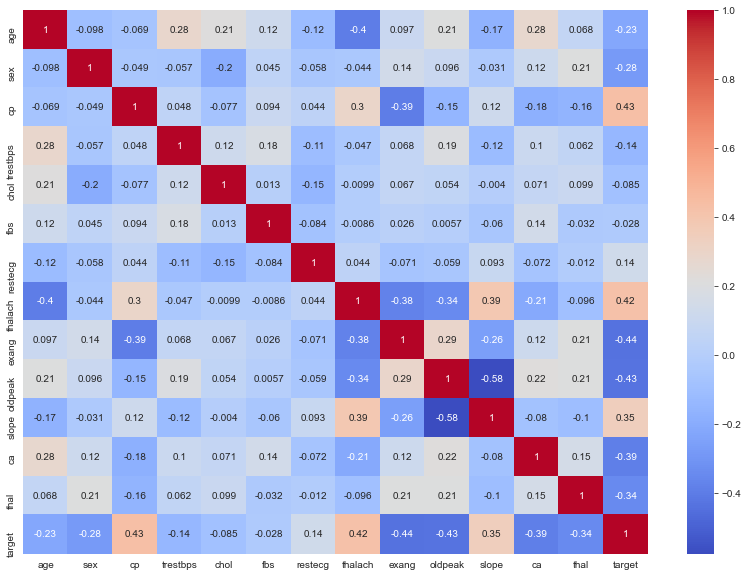

In [39]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

## Insight:

Dari grafik korelasi terhadap kolom target, feature-feature yang memiliki korelasi diatas 40% antara lain:
- cp: chest pain, dengan korelasi positif
- thalach dengan korelasi positif,
- ExAng (Exercise induced angina), yang merupakan feature categorical, memiliki korelasi negatif: faktor tekanan darah yang tidak terpengaruhi oleh exercise menghasilkan diagnosa negatif pada pemeriksaan jantung pasien
- oldpeak dengan korelasi negatif. Seperti telah dibahas sebelumnya, feature oldpeak berkaitan dengan ST depression, dimana ST depression berasosiasi 100% dengan risiko serangan jantung (https://pubmed.ncbi.nlm.nih.gov/11741361/). Dalam grafik, terlihat bahwa pasien dengan oldpeak = 0 lebih cenderung menghasilkan diagnosa positif penyakit jantung.

# Machine Learning

sebelum dilakukan penentuan model algoritma machine learning, perlu dilakukan data cleaning dan feature engineering.
Dalam data preparation dan Exploratory data analysis didapatkan insight sbb:
- tidak ada data null ==> tidak perlu impute data null
    - jika ada data null pada feature kategori, kolom Null bisa diisi dengan modus data pada feature tsb
    - jika ada data null pada feature numerik, kolom Null bisa diisi dengan:
        1. mean: jika tidak terdapat outliers pada distribusi data feature tsb
        2. median: jika terdapat outliers pada distribusi data feature tsb
        
- feature target memiliki komposisi balanced ==> tidak perlu dilakukan handling imbalanced data
    - jika data kolom target imbalanced (komposisi sekitar 80:20), maka harus dilakukan handling terhadap imbalanced data menggunakan metode-metode: undersampling, oversampling, SMOTE, atau tuning class_weight
    
- nilai-nilai outliers relatif sedikit, namun pada feature trestbps (tekanan darah pada kondisi istirahat), kolom target pada data-data tekanan darah outliers kebanyakan menghasilkan diagnosa 0, sehingga data outliers pada kolom trestbps akan dihapus untuk menghindari bias pada hasil.

In [40]:
df_clean = df.copy()

In [41]:
outliers = df_clean[(df_clean['trestbps'] == 172) | (df_clean['trestbps'] == 174) |  (df_clean['trestbps'] == 178) |  (df_clean['trestbps'] == 180) | (df['trestbps'] == 192) |
(df_clean['trestbps'] == 200)]

In [42]:
outliers

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0


In [43]:
df_clean.drop([8, 101, 110, 203, 223, 241, 248, 260, 266], inplace=True)

# Splitting Data

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X = df_clean.drop(columns='target')
y = df_clean['target']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

## Pipeline

Meskipun angka-angka dalam feature-feature dataset tidak terlalu memiliki gap yang besar (angka maksimum pada kolom kolesterol berada pada range 500), namun akan tetap digunakan metode scaling untuk data preprocessing

Metode scaling yang digunakan adalah StandardScaler (sudah dicoba RobustScaler sebelumnya namun hasil dengan recall lebih baik didapat dari penggunaan StandardScaler)

In [47]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import warnings

warnings.filterwarnings('ignore')

In [48]:
prep = Pipeline([
    ("Scaler", StandardScaler())
])

In [49]:
X_train_prep = prep.fit_transform(X_train)
X_train_prep

array([[-0.68547968,  0.65845762, -0.9498755 , ...,  0.94487725,
        -0.67619932, -0.55418416],
       [ 0.75977614,  0.65845762, -0.9498755 , ...,  0.94487725,
         0.36606279,  1.11651809],
       [-1.46369435,  0.65845762,  0.959188  , ..., -0.69664679,
        -0.67619932, -0.55418416],
       ...,
       [ 2.20503195, -1.51870063,  0.00465625, ...,  0.94487725,
         0.36606279, -0.55418416],
       [ 1.87151138, -1.51870063, -0.9498755 , ..., -0.69664679,
        -0.67619932, -0.55418416],
       [ 0.64860261, -1.51870063,  1.91371976, ...,  0.94487725,
        -0.67619932, -0.55418416]])

In [50]:
X_test_prep = prep.fit_transform(X_test)

In [51]:
X_test_prep.shape

(89, 13)

In [52]:
X_train_prep.shape

(205, 13)

### model 1: Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
modelLog = LogisticRegression()

In [55]:
modelLog.fit(X_train_prep, y_train)

LogisticRegression()

In [56]:
y_predlog = modelLog.predict(X_test_prep)

### Model Evaluation

Karena data kolom target relatif balance, maka secara garis besar hasil akurasi tidak bersifat bias, maka evaluasi yang ditinjau adalah accuracy model. Selain itu, karena yang dihindari adalah diagnosa False Negative, dimana seharusnya hasil menyatakan pasien memiliki penyakit jantung, namun hasil diagnosa menyatakan tidak. maka evaluasi lain yang diperhatikan adalah recall, karena persamaan recall yang mempertimbangkan nilai FN

Persamaan: Recall = (TP) / (TP + FN)

In [57]:
from sklearn.metrics import confusion_matrix, classification_report, recall_score, f1_score, accuracy_score, precision_score

In [58]:
print(classification_report(y_test, y_predlog))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72        40
           1       0.76      0.84      0.80        49

    accuracy                           0.76        89
   macro avg       0.77      0.76      0.76        89
weighted avg       0.76      0.76      0.76        89



### model 2: KNearest Neighbors

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
modelKNN = KNeighborsClassifier(n_neighbors=3)

In [61]:
modelKNN.fit(X_train_prep, y_train)

KNeighborsClassifier(n_neighbors=3)

In [62]:
y_predknn = modelKNN.predict(X_test_prep)

In [63]:
# evaluation

print(classification_report(y_test, y_predknn))

              precision    recall  f1-score   support

           0       0.85      0.70      0.77        40
           1       0.79      0.90      0.84        49

    accuracy                           0.81        89
   macro avg       0.82      0.80      0.80        89
weighted avg       0.81      0.81      0.81        89



### model 3: RandomForest

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
modelRF = RandomForestClassifier()

In [66]:
modelRF.fit(X_train_prep, y_train)

RandomForestClassifier()

In [67]:
y_predRF = modelRF.predict(X_test_prep)

In [68]:
# evaluation

print(classification_report(y_test, y_predRF))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73        40
           1       0.77      0.82      0.79        49

    accuracy                           0.76        89
   macro avg       0.76      0.76      0.76        89
weighted avg       0.76      0.76      0.76        89



#### Summary menggunakan model basic: Logistic, KNN, RandomForest tanpa Parameter Tuning

In [69]:
df_summary = pd.DataFrame()

In [70]:
df_summary['model'] = ['Logistic Regression', 'KNearest Neighbors', 'Random Forest']

In [71]:
# Recall: rasio prediksi diagnosa 'yes' sebagai True Positive terhadap True Positive dan False Negative
# Recall = (TP) / (TP + FN)
df_summary['recall'] = [recall_score(y_test, y_predlog, pos_label=1), recall_score(y_test, y_predknn, pos_label=1),
                    recall_score(y_test, y_predRF, pos_label=1)]

# accuracy: rasio prediksi diagnosa True (True Positive dan True Negative) terhadap keseluruhan hasil dalam confusion matrix (TP, TN. FP, FN)
# accuracy = TP + TN / (TP + TN + FP + FN)
df_summary['accuracy'] = [accuracy_score(y_test, y_predlog), accuracy_score(y_test, y_predknn),
                    accuracy_score(y_test, y_predRF)]

# Precission: rasio prediksi diagnosa True (True Positive dan True Negative) dibandingkan dengan keseluruhan hasil yang diprediksi positif
# Precission = (TP) / (TP+FP)
# Berapa % yang 'Placed' dari keseluruhan yang diprediksi 'Placed'
df_summary['precision'] = [precision_score(y_test, y_predlog, pos_label=1), precision_score(y_test, y_predknn, pos_label=1),
                    precision_score(y_test, y_predRF, pos_label=1)]

# F1 Score merupakan perbandingan rata-rata presisi dan recall yang dibobotkan
# F1 Score = 2 * (Recall*Precission) / (Recall + Precission)
df_summary['F1 Score'] = 2 * (df_summary['recall'] * df_summary['precision']) / (df_summary['recall'] + df_summary['precision'])



In [72]:
df_summary

,model,recall,accuracy,precision,F1 Score
0,Logistic Regression,0.836735,0.764045,0.759259,0.796117
1,KNearest Neighbors,0.897959,0.808989,0.785714,0.838095
2,Random Forest,0.816327,0.764045,0.769231,0.792079


# Hyperparameter Tuning

Proses fit modeling menggunakan parameter tuning lebih kompleks dibandingkan tanpa menggunakan parameter tuning, dimana performa hardware yang digunakan menjadi salah satu penentu lamanya waktu fitting model. Oleh karena itu, sebelum dilakukan parameter tuning, dilakukan feature selection, untuk memilih beberapa feature dari keseluruhan, yang akan diperhitungkan dalam algoritma machine learning.

# Feature Engineering & Feature Selection

Pada EDA sudah dilakukan analisis terhadap korelasi feature-feature terhadap kolom target (heatmap correlation), kali ini feature selection akan menggunakan metode SelectKBest dengan metode chi2.

In [73]:
from sklearn.feature_selection import SelectKBest, chi2

In [74]:
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X_train, y_train)

In [75]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

In [76]:
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns =['Features', 'Score']

In [77]:
featureScores

,Features,Score
0,age,23.254927
1,sex,6.212395
2,cp,35.878585
3,trestbps,2.457483
4,chol,20.433050
5,fbs,0.116715
6,restecg,2.654677
7,thalach,183.546666
8,exang,26.982123
9,oldpeak,62.126162


In [78]:
print(featureScores.nlargest(8, 'Score'))

   Features       Score
7   thalach  183.546666
11       ca   76.937194
9   oldpeak   62.126162
2        cp   35.878585
8     exang   26.982123
0       age   23.254927
4      chol   20.433050
10    slope    8.682856


## Insight

Score chi square antara chol dan slope relatif cukup jauh bedanya dibandingkan beberapa data score chi2 dari 8 features dengan chi2 tertinggi, sehingga untuk pembuatan model dengan hyperparameter tuning, akan digunakan 7 feature teratas.

==> setelah dilakukan hyperparameter dengan 7 feature, dicoba kembali menggunakan 8 feature dan penggunaan 8 feature memberikan hasil evaluasi lebih baik.

In [79]:
df_clean

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Hyperparameter Tuning

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
df_hyper = df_clean[['thalach', 'ca', 'oldpeak', 'cp', 'exang', 'age', 'chol', 'target', 'slope']]

In [82]:
df_hyper.shape

(294, 9)

In [83]:
df_hyper

,thalach,ca,oldpeak,cp,exang,age,chol,target,slope
0,150,0,2.3,3,0,63,233,1,0
1,187,0,3.5,2,0,37,250,1,0
2,172,0,1.4,1,0,41,204,1,2
3,178,0,0.8,1,0,56,236,1,2
4,163,0,0.6,0,1,57,354,1,2
...,...,...,...,...,...,...,...,...,...
298,123,0,0.2,0,1,57,241,0,1
299,132,0,1.2,3,0,45,264,0,1
300,141,2,3.4,0,0,68,193,0,1
301,115,1,1.2,0,1,57,131,0,1


### Splitting data

In [84]:
X = df_hyper.drop(columns='target')
y = df_hyper['target']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

### Pipeline

In [86]:
scale = Pipeline([
    ('Scaler', StandardScaler())
])

In [87]:
X_train_hype = scale.fit_transform(X_train)
X_test_hype = scale.fit_transform(X_test)

### model dengan hyperparameter tuning dilakukan terhadap data yang sudah discaling menggunakan StandardScaler (pada proses pipeline), sehingga pada proses fitting model, yang diinput adalah parameter X_train dan  predict menggunakan X_test hasil train_test_split awal.

Sementara ketika sudah didapatkan model yang terbaik dari cross validation menggunakan GridSearchCV, fitting model akhir dilakukan terhadap X_train yang sudah dilakukan StandardScaler, yaitu X_train_hype dan predict menggunakan X_test_hype.

## 1: Hyperparameter Tuning LogisticRegression

In [88]:
logReg = Pipeline([
    ("scaled", scale),
    ("algo", LogisticRegression())
])

In [89]:
logReg.get_params()

{'memory': None,
 'steps': [('scaled', Pipeline(steps=[('Scaler', StandardScaler())])),
  ('algo', LogisticRegression())],
 'verbose': False,
 'scaled': Pipeline(steps=[('Scaler', StandardScaler())]),
 'algo': LogisticRegression(),
 'scaled__memory': None,
 'scaled__steps': [('Scaler', StandardScaler())],
 'scaled__verbose': False,
 'scaled__Scaler': StandardScaler(),
 'scaled__Scaler__copy': True,
 'scaled__Scaler__with_mean': True,
 'scaled__Scaler__with_std': True,
 'algo__C': 1.0,
 'algo__class_weight': None,
 'algo__dual': False,
 'algo__fit_intercept': True,
 'algo__intercept_scaling': 1,
 'algo__l1_ratio': None,
 'algo__max_iter': 100,
 'algo__multi_class': 'auto',
 'algo__n_jobs': None,
 'algo__penalty': 'l2',
 'algo__random_state': None,
 'algo__solver': 'lbfgs',
 'algo__tol': 0.0001,
 'algo__verbose': 0,
 'algo__warm_start': False}

In [90]:
paramLog = {
    'algo__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'algo__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'algo__max_iter': [1, 10, 100, 1000],
    'algo__multi_class': ['auto', 'ovr', 'multinomial']
}

In [91]:
Log_GS = GridSearchCV(logReg, paramLog, cv=5, n_jobs=-1, verbose=1)

In [92]:
Log_GS.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 920 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:    4.5s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaled',
                                        Pipeline(steps=[('Scaler',
                                                         StandardScaler())])),
                                       ('algo', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'algo__max_iter': [1, 10, 100, 1000],
                         'algo__multi_class': ['auto', 'ovr', 'multinomial'],
                         'algo__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'algo__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                          'sag', 'saga']},
             verbose=1)

In [93]:
Log_GS.best_params_

{'algo__max_iter': 1,
 'algo__multi_class': 'auto',
 'algo__penalty': 'l2',
 'algo__solver': 'sag'}

In [94]:
modelLogGS = LogisticRegression(max_iter=1, multi_class='ovr', penalty='l2', solver='saga')

In [95]:
modelLogGS.fit(X_train_hype, y_train)

LogisticRegression(max_iter=1, multi_class='ovr', solver='saga')

In [96]:
y_predHypLog = modelLogGS.predict(X_test_hype)

In [97]:
print(classification_report(y_test, y_predHypLog))

              precision    recall  f1-score   support

           0       0.73      0.68      0.70        40
           1       0.75      0.80      0.77        49

    accuracy                           0.74        89
   macro avg       0.74      0.74      0.74        89
weighted avg       0.74      0.74      0.74        89



## 2: Hyperparameter Tuning KNearestNeighbors

In [98]:
KNN = Pipeline([
    ("scaled", scale),
    ("algo", KNeighborsClassifier())
])

In [99]:
KNN.get_params()

{'memory': None,
 'steps': [('scaled', Pipeline(steps=[('Scaler', StandardScaler())])),
  ('algo', KNeighborsClassifier())],
 'verbose': False,
 'scaled': Pipeline(steps=[('Scaler', StandardScaler())]),
 'algo': KNeighborsClassifier(),
 'scaled__memory': None,
 'scaled__steps': [('Scaler', StandardScaler())],
 'scaled__verbose': False,
 'scaled__Scaler': StandardScaler(),
 'scaled__Scaler__copy': True,
 'scaled__Scaler__with_mean': True,
 'scaled__Scaler__with_std': True,
 'algo__algorithm': 'auto',
 'algo__leaf_size': 30,
 'algo__metric': 'minkowski',
 'algo__metric_params': None,
 'algo__n_jobs': None,
 'algo__n_neighbors': 5,
 'algo__p': 2,
 'algo__weights': 'uniform'}

In [100]:
paramKNN = {
    'algo__n_neighbors' : [3, 5, 7, 9, 11],
    'algo__weights': ['uniform', 'distance'],
    'algo__p': [2, 1],
    'algo__algorithm': ['auto’, ‘ball_tree', 'kd_tree']
}

In [101]:
KNN_GS = GridSearchCV(KNN, paramKNN, cv=5, n_jobs=-1, verbose=1)

In [102]:
KNN_GS.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaled',
                                        Pipeline(steps=[('Scaler',
                                                         StandardScaler())])),
                                       ('algo', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'algo__algorithm': ['auto’, ‘ball_tree', 'kd_tree'],
                         'algo__n_neighbors': [3, 5, 7, 9, 11],
                         'algo__p': [2, 1],
                         'algo__weights': ['uniform', 'distance']},
             verbose=1)

In [103]:
KNN_GS.best_params_

{'algo__algorithm': 'kd_tree',
 'algo__n_neighbors': 9,
 'algo__p': 2,
 'algo__weights': 'uniform'}

In [104]:
modelKNNGS = KNeighborsClassifier(n_neighbors=9, p=2, weights ='uniform', algorithm='kd_tree')

In [105]:
modelKNNGS.fit(X_train_hype, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=9)

In [106]:
y_predHypKnn = modelKNNGS.predict(X_test_hype)

In [107]:
print(classification_report(y_test, y_predHypKnn))

              precision    recall  f1-score   support

           0       0.75      0.68      0.71        40
           1       0.75      0.82      0.78        49

    accuracy                           0.75        89
   macro avg       0.75      0.75      0.75        89
weighted avg       0.75      0.75      0.75        89



## 3: Hyperparameter Tuning RandomForest

In [108]:
RF = Pipeline([
    ("scaled", scale),
    ("algo", RandomForestClassifier())
])

In [109]:
RF.get_params()

{'memory': None,
 'steps': [('scaled', Pipeline(steps=[('Scaler', StandardScaler())])),
  ('algo', RandomForestClassifier())],
 'verbose': False,
 'scaled': Pipeline(steps=[('Scaler', StandardScaler())]),
 'algo': RandomForestClassifier(),
 'scaled__memory': None,
 'scaled__steps': [('Scaler', StandardScaler())],
 'scaled__verbose': False,
 'scaled__Scaler': StandardScaler(),
 'scaled__Scaler__copy': True,
 'scaled__Scaler__with_mean': True,
 'scaled__Scaler__with_std': True,
 'algo__bootstrap': True,
 'algo__ccp_alpha': 0.0,
 'algo__class_weight': None,
 'algo__criterion': 'gini',
 'algo__max_depth': None,
 'algo__max_features': 'auto',
 'algo__max_leaf_nodes': None,
 'algo__max_samples': None,
 'algo__min_impurity_decrease': 0.0,
 'algo__min_impurity_split': None,
 'algo__min_samples_leaf': 1,
 'algo__min_samples_split': 2,
 'algo__min_weight_fraction_leaf': 0.0,
 'algo__n_estimators': 100,
 'algo__n_jobs': None,
 'algo__oob_score': False,
 'algo__random_state': None,
 'algo__verbose

In [110]:
paramRF = {
    'algo__n_estimators': [100, 200, 250, 300, 400],
    'algo__max_features': ['auto', 'sqrt', 'log2'],
    'algo__criterion': ['gini', 'entropy']
}

In [111]:
modelRF_GS = GridSearchCV(RF, paramRF, cv=5, n_jobs=-1, verbose=1)

In [112]:
modelRF_GS.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    9.5s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaled',
                                        Pipeline(steps=[('Scaler',
                                                         StandardScaler())])),
                                       ('algo', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'algo__criterion': ['gini', 'entropy'],
                         'algo__max_features': ['auto', 'sqrt', 'log2'],
                         'algo__n_estimators': [100, 200, 250, 300, 400]},
             verbose=1)

In [113]:
modelRF_GS.best_params_

{'algo__criterion': 'gini',
 'algo__max_features': 'auto',
 'algo__n_estimators': 100}

In [114]:
modelRF_GS = RandomForestClassifier(criterion='gini', max_features='auto', n_estimators=400)

In [115]:
modelRF_GS.fit(X_train_hype, y_train)

RandomForestClassifier(n_estimators=400)

In [116]:
y_predHypRF = modelRF_GS.predict(X_test_hype)

In [117]:
print(classification_report(y_test, y_predHypRF))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        40
           1       0.76      0.76      0.76        49

    accuracy                           0.73        89
   macro avg       0.73      0.73      0.73        89
weighted avg       0.73      0.73      0.73        89



### Summary

In [118]:
summary_hype = pd.DataFrame()

In [119]:
summary_hype['model'] = ['Logistic Regression Hyperparameter', 'KNearest Neighbors Hyperparameter', 'Random Forest Hyperparameter']

In [120]:
# Recall: rasio prediksi diagnosa 'yes' sebagai True Positive terhadap True Positive dan False Negative
# Recall = (TP) / (TP + FN)
summary_hype['recall'] = [recall_score(y_test, y_predHypLog, pos_label=1), recall_score(y_test, y_predHypKnn, pos_label=1),
                    recall_score(y_test, y_predHypRF, pos_label=1)]

# accuracy: rasio prediksi diagnosa True (True Positive dan True Negative) terhadap keseluruhan hasil dalam confusion matrix (TP, TN. FP, FN)
# accuracy = TP + TN / (TP + TN + FP + FN)
summary_hype['accuracy'] = [accuracy_score(y_test, y_predHypLog), accuracy_score(y_test, y_predHypKnn),
                    accuracy_score(y_test, y_predHypRF)]

# Precission: rasio prediksi diagnosa True (True Positive dan True Negative) dibandingkan dengan keseluruhan hasil yang diprediksi positif
# Precission = (TP) / (TP+FP)
# Berapa % yang 'Placed' dari keseluruhan yang diprediksi 'Placed'
summary_hype['precision'] = [precision_score(y_test, y_predHypLog, pos_label=1), precision_score(y_test, y_predHypKnn, pos_label=1),
                    precision_score(y_test, y_predHypRF, pos_label=1)]

# F1 Score merupakan perbandingan rata-rata presisi dan recall yang dibobotkan
# F1 Score = 2 * (Recall*Precission) / (Recall + Precission)
summary_hype['F1 Score'] = 2 * (summary_hype['recall'] * summary_hype['precision']) / (summary_hype['recall'] + summary_hype['precision'])



In [121]:
summary_hype

,model,recall,accuracy,precision,F1 Score
0,Logistic Regression Hyperparameter,0.795918,0.741573,0.750000,0.772277
1,KNearest Neighbors Hyperparameter,0.816327,0.752809,0.754717,0.784314
2,Random Forest Hyperparameter,0.755102,0.730337,0.755102,0.755102


In [122]:
summary = pd.concat([df_summary, summary_hype])

In [123]:
summary

,model,recall,accuracy,precision,F1 Score
0,Logistic Regression,0.836735,0.764045,0.759259,0.796117
1,KNearest Neighbors,0.897959,0.808989,0.785714,0.838095
2,Random Forest,0.816327,0.764045,0.769231,0.792079
0,Logistic Regression Hyperparameter,0.795918,0.741573,0.750000,0.772277
1,KNearest Neighbors Hyperparameter,0.816327,0.752809,0.754717,0.784314
2,Random Forest Hyperparameter,0.755102,0.730337,0.755102,0.755102


### Penjelasan Evaluasi Model

evaluasi model dapat dilakukan terhadap beberapa parameter, yaitu recall, precision, accuracy, f1 score, dll. Dalam model machine learning yang digunakan, diharapkan machine dapat menghasilkan False Negative yang minimal, karena false negative di sini berarti pasien dengan kondisi penyakit jantung, namun hasil diagnosa disebutkan bahwa pasien tidak memiliki penyakit jantung. Hal ini yang harus dihindari, sehingga indikator utama model memberikan hasil yang baik dalam prediksi keberadaan penyakit jantung adalah indikator recall. 

Dalam pembuatan model machine learning yang sudah dilakukan, model yang menunjukkan tingkat recall yang baik, disertai dengan accuracy yang baik merupakan model KNearestNeighbors dengan n_neighbors=3, dan tanpa hyperparameter tuning, dan menggunakan scaler: StandardScaler. Tingkat akurasi yang dihasilkan juga relatif baik, yaitu mencapai 80%. Sehingga model ini yang akan digunakan untuk prediksi keberadaan penyakit jantung di Rumah Sakit XYZ.

### Detail deskripsi evaluasi terhadap model terpilih: KNN

In [124]:
print(classification_report(y_test, y_predknn))

              precision    recall  f1-score   support

           0       0.85      0.70      0.77        40
           1       0.79      0.90      0.84        49

    accuracy                           0.81        89
   macro avg       0.82      0.80      0.80        89
weighted avg       0.81      0.81      0.81        89



### Penjelasan hasil evaluation classification_report:

Hasil evaluasi classification_report didapat dari perhitungan-perhitungan terhadap parameter-parameter dalam confusion matrix.

1. Precision: positive predictive value ==> perbandingan nilai True Positive (Prediksi Positif dan Actual Positif) terhadap seluruh hasil True (True Positive + False Positive (False Positive: Prediksi Positif dan Actual Negatif))
    - untuk pemodelan prediksi yang memberikan hasil 1 (Diagnosa positif sakit jantung), tingkat kesesuaian prediksi dengan actual target mencapai 79%
    - untuk pemodelan prediksi yang memberikan hasil 0 (Diagnosa negatif sakit jantung), tingkat kesesuaian prediksi dengan actual target mencapai 85%
    
2. Recall: perbandingan nilai True Positive (Prediksi Positif dan Actual Positif) terhadap True Positive dan False Negative (False Negative: Prediksi Negatif dan Actual Positif)
    - untuk pemodelan prediksi yang memberikan hasil 1 (Diagnosa positif sakit jantung), tingkat kesesuaian prediksi dengan actual target mencapai 90%
    - untuk pemodelan prediksi yang memberikan hasil 0 (Diagnosa negatif sakit jantung), tingkat kesesuaian prediksi dengan actual target mencapai 70%
    
3. F1 score: perbandingan rata-rata precision dan recall yang dibobotkan. Persamaan: F1 Score = 2 * (Recall*Precission) / (Recall + Precission)
    - untuk pemodelan prediksi yang memberikan hasil 1 (Diagnosa positif sakit jantung), tingkat kesesuaian prediksi dengan actual target mencapai 84%
    - untuk pemodelan prediksi yang memberikan hasil 0 (Diagnosa negatif sakit jantung), tingkat kesesuaian prediksi dengan actual target mencapai 77%
    
4. Accuracy: Tingkat akurasi model ==> perbandingan seluruh prediksi value True (Positif dan Negatif, dimana prediksi sesuai dengan aktual) terhadap seluruh komponen lain dalam confusion matrix (TP + TN + FP + FN)
    - Tingkat akurasi model KNN adalah sebesar 81%

# Kesimpulan

- berdasarkan feature importance dari uji chi2 (chi square) dan heatmap korelasi, feature-feature yang berpengaruh terhadap diagnosa penyakit jantung antara lain:
    1. thalach ==> kondisi talasemia (kelainan dalam keping darah)
    2. ca ==> hasil fluoroscopy terhadap pembuluh darah
    3. oldpeak ==> ST depression yang dihasilkan dari pemeriksaan setelah berolahraga
    4. cp ==> chestpain (nyeri dada)
    5. ExAng ==> kondisi pembuluh darah dari pemeriksaan setelah berolahraga
    6. age ==> usia
    7. chol ==> kolesterol darah
    
- faktor usia cukup berkorelasi terhadap risiko seseorang memiliki penyakit jantung, namun hal ini juga ditentukan oleh faktor-faktor lain seperti thalasemia, kondisi pembuluh darah, dll yang sudah disebutkan pada poin pertama.

- indikator evaluasi yang digunakan adalah nilai recall, karena menghindari hasil False Negative.

- beberapa model machine learning diuji coba untuk menghasilkan hasil evaluasi yang baik, diantaranya model:
    1. Logistic regression dengan dan tanpa hyperparameter tuning
    2. KNearest Neighbors dengan dan tanpa hyperparameter tuning
    3. Random Forest dengan dan tanpa hyperparameter tuning


- Model yang menunjukkan nilai recall dan tingkat akurasi yang paling baik diantara model-model yang sudah dicoba adalah model KNearest Neighbors tanpa parameter tuning dengan jumlah n_neighbors = 3 dan menggunakan StandardScaler. Model ini mampu memberikan prediksi False Negative paling minim, dengan tingkat recall untuk prediksi seseorang terdiagnosa berpenyakit jantung adalah sebesar 90%.
  

- Model ini sangat bermanfaat bagi tenaga kesehatan di rumah sakit maupun fasilitas kesehatan lainnya. Hal ini karena model mampu mempersingkat proses diagnosa pasien berdasarkan data historisnya, sehingga jumlah pasien yang akan dilakukan pemeriksaan lebih lanjut sudah tersortir dari seluruh pasien yang memiliki keluhan tentang kondisi jantungnya. Terlebih di masa pandemi ini, dimana beban rumah sakit dan tenaga kesehatan berpotensi overload, penggunaan model machine learning mampu mengurangi beban tenaga kesehatan, khususnya dokter untuk mendiagnosa pasien.

# Saran

- Dibutuhkan pemeriksaan lebih lanjut dan menyeluruh, serta treatment yang tepat terhadap pasien yang masuk kategori memiliki penyakit jantung (berdasarkan model algoritma machine learning yang telah dibuat)

## Export Model menggunakan pickle

In [125]:
import pickle

In [126]:
with open ('HeartDiagnose', 'wb') as ML:  ## irisModel: nama file
    pickle.dump(modelKNN, ML)